# Threshold Adjustment

👇 Load the player `player_performances.csv` dataset to see what you will be working with.

In [23]:
import pandas as pd

data = pd.read_csv('data/player_performances.csv')

data.head()


,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers,target_5y
0,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,1.6,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,2.6,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,0.9,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,0.9,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,1.3,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


ℹ️ Each observation represents a player and each column a characteristic of performance. The target `target_5y` defines whether the player has had a professional career of less than 5 years [0] or 5 years or more [1].

# Preprocessing

👇 To avoid spending too much time on the preprocessing, Robust Scale the entire feature set. This practice is not optimal, but can be used for preliminary preprocessing and/or to get models up and running quickly.

Save the scaled feature set as `X_scaled`.

In [24]:
# YOUR CODE HERE
# RobustScaler
from sklearn.preprocessing import RobustScaler

# Create the scaler
scaler = RobustScaler()
X = data.drop(columns = ['target_5y'])

# Fit the scaler
scaler.fit(X)
# Scale the data and print the result
X_scaled = scaler.transform(X)
X_scaled


array([[-0.9       ,  0.9338843 ,  0.35294118, ..., -0.2       ,
         0.5       ,  0.375     ],
       [-0.93333333,  0.89256198,  0.31372549, ...,  1.2       ,
         0.75      ,  0.75      ],
       [ 0.36666667, -0.0661157 , -0.07843137, ...,  0.        ,
         0.25      ,  0.        ],
       ...,
       [-0.66666667, -0.33057851, -0.03921569, ..., -0.4       ,
         0.5       , -0.125     ],
       [-0.36666667, -0.33884298, -0.21568627, ..., -0.2       ,
        -0.25      , -0.25      ],
       [-0.53333333, -0.36363636, -0.23529412, ...,  0.4       ,
        -0.25      , -0.125     ]])

### ☑️ Check your code

In [25]:
from nbresult import ChallengeResult

result = ChallengeResult('scaled_features',
                         scaled_features = X_scaled
)

result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/05-ML/03-Performance-metrics/data-threshold-adjustments/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_scaled_features.py::TestScaled_features::test_scaled_features PASSED [100%]

============================== 1 passed in 0.09s ===============================


💯 You can commit your code:

git add tests/scaled_features.pickle

git commit -m 'Completed scaled_features step'

git push origin master



# Base modeling

🎯 The task is to detect players who will last 5 years minimum as professionals, with a 90% guarantee.

👇 Is a default Logistic Regression model going to satisfy the coach's requirements? Use cross-validation and save the score that supports your answer under variable name `base_score`.

In [26]:
# Detect players with target_5y == 1 with a 90% guarantee
# using Logistic Regression and cross validation on the scaled features

# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create the model
model = LogisticRegression()

# Cross-validate the model
scores = cross_val_score(model, X_scaled, data['target_5y'], cv = 5)

# Print the mean score
print(scores.mean())


0.7010554688608314


In [27]:
# YOUR CODE HERE

# Use Logistic Regression model with cross validation
# and detect players who will last 5 years in the league,
# with a guarantee of 90%
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

# Create the model
model = LogisticRegression()

# Cross validate the model
cv_results = cross_validate(model, X_scaled, data['target_5y'], cv=5, scoring='precision')

# Print the mean recall score
cv_results['test_score'].mean()

base_score = cv_results['test_score'].mean()
print(cv_results['test_score'].mean())


0.7379036747632812


### ☑️ Check your code

In [28]:
from nbresult import ChallengeResult

result = ChallengeResult('base_precision',
                         score = base_score
)

result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/05-ML/03-Performance-metrics/data-threshold-adjustments/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_base_precision.py::TestBase_precision::test_precision_score PASSED  [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/base_precision.pickle

git commit -m 'Completed base_precision step'

git push origin master



# Threshold adjustment

👇 Find the decision threshold that guarantees a 90% precision for a player to last 5 years or more as a professional. Save the threshold under variable name `new_threshold`.

<details>
<summary>💡 Hint</summary>

- Make cross validated probability predictions with [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html)
    
- Plug the probabilities into [`precision_recall_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) to generate precision scores at different thresholds

- Find out which threshold guarantees a precision of 0.9
      
</details>



In [29]:
# YOUR CODE HERE
# Find the decision threshold that guarantees a precision of 90% for a player to last 5 years
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, precision_recall_curve

# Create the model
model = LogisticRegression()

# Cross validate the model and predict class probabilities
data["proba_less_than_5"], data["5_or_more"] = cross_val_predict(
    model, X_scaled, data["target_5y"], cv=5, method="predict_proba"
).T

# precision recall threshold
precision, recall, threshold = precision_recall_curve(
    data["target_5y"], data["5_or_more"]
)

scores = pd.DataFrame({'threshold':threshold,
                       'precision': precision[:-1],
                       'recall':recall[:-1]}) # Store in a dataframe
scores


,threshold,precision,recall
0,0.043222,0.621988,1.000000
1,0.071775,0.622457,1.000000
2,0.071827,0.622926,1.000000
3,0.081373,0.623396,1.000000
4,0.095488,0.623112,0.998789
...,...,...,...
1294,0.987010,1.000000,0.006053
1295,0.987417,1.000000,0.004843
1296,0.987636,1.000000,0.003632
1297,0.993303,1.000000,0.002421


Text(0.5, 0, 'recall')

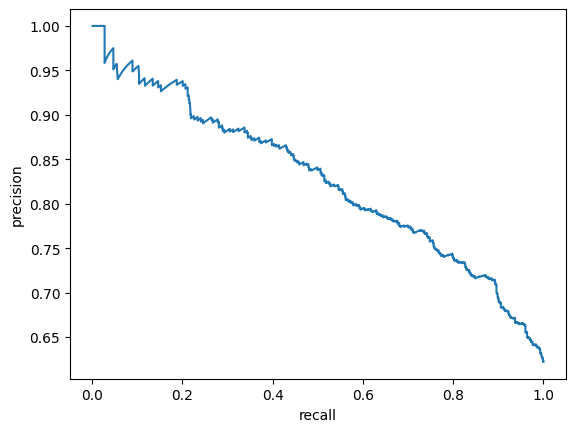

In [30]:
import matplotlib.pyplot as plt

plt.plot(scores['recall'],scores['precision'])
plt.ylabel('precision')
plt.xlabel('recall')


In [31]:
# Find the threshold that guarantees a precision of 90%
new_threshold = scores[scores['precision'] == 0.9].threshold.max()
print(new_threshold)


0.8667403198812461


### ☑️ Check your code

In [32]:
from nbresult import ChallengeResult

result = ChallengeResult('decision_threshold',
                         threshold = new_threshold
)

result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/05-ML/03-Performance-metrics/data-threshold-adjustments/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_decision_threshold.py::TestDecision_threshold::test_new_threshold PASSED [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/decision_threshold.pickle

git commit -m 'Completed decision_threshold step'

git push origin master



# Using the new threshold

🎯 The coach has spotted a potentially interesting player, but wants your 90% guarantee that he would last 5 years minimum as a pro. Download the player's data [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_New_player.csv).

In [33]:
new_player = pd.read_csv("data/ML_New_player.csv")

new_player


,games played,minutes played,points per game,field goals made,field goal attempts,field goal percent,3 point made,3 point attempt,3 point %,free throw made,free throw attempts,free throw %,offensive rebounds,defensive rebounds,rebounds,assists,steals,blocks,turnovers
0,80,31.4,14.3,5.9,11.1,52.5,0.0,0.1,11.1,2.6,3.9,65.4,3.0,5.0,8.0,2.4,1.1,0.8,2.2


❓ Would you risk recommending the player to the coach? Save your answer as string under variable name `recommendation` as "recommend" or "not recommend".

In [40]:
# Use the custom_predict function to predict if the new player will last 5 years in the league
# using the new threshold
from sklearn.metrics import f1_score, recall_score
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()
model.fit(X_scaled, data['target_5y'])

def custom_predict(X, custom_threshold):
    probs = model.predict_proba(X)

    five_years_or_more_probs = probs[:, 1]
    print(five_years_or_more_probs)

    return (five_years_or_more_probs > custom_threshold).astype(
        int
    )  # Boolean outcome converted to 0 or 1

new_X_scaled = scaler.transform(new_player)
updated_predictions = custom_predict(new_X_scaled, new_threshold)
print(updated_predictions)


recommendation = "recommend" if updated_predictions[0] == 1 else "not recommend"
print("Recommendation: ", recommendation)


[0.9454838]
[1]
Recommendation:  recommend


### ☑️ Check your code

In [41]:
from nbresult import ChallengeResult

result = ChallengeResult('recommendation',
                         recommendation = recommendation
)

result.write()
print(result.check())



============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/tanushrinayak/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/tanushrinayak/code/tanushrin/05-ML/03-Performance-metrics/data-threshold-adjustments/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_recommendation.py::TestRecommendation::test_recommendation PASSED   [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/recommendation.pickle

git commit -m 'Completed recommendation step'

git push origin master



# 🏁